# Session 2 - Homework
#### By Quynh Le

Part of the [Machine Learning Zoomcamp (September 2021 – December 2021)](https://datatalks.club/courses/2021-winter-ml-zoomcamp.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# No need to rerun this after first time as file already saved in folder:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-18 18:40:56--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: 'AB_NYC_2019.csv'

     0K .......... .......... .......... .......... ..........  0% 1.64M 4s
    50K .......... .......... .......... .......... ..........  1% 2.92M 3s
   100K .......... .......... .......... .......... ..........  2% 2.82M 3s
   150K .......... .......... .......... .......... ..........  2% 5.23M 2s
   200K .......... .......... .......... .......... ..........  3% 3.01M 2s
   250K .......... .......... .......... .......... ..........  4% 6.19M 2s
   300K .......... .......... .......... .......... ..........  5% 5.34M 2s
   350K .......... .....

In [3]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Exploratory Data Analysis

In [5]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

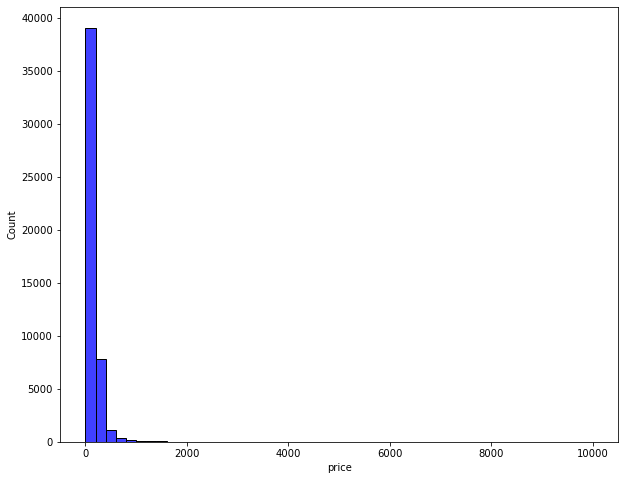

In [6]:
plt.figure(figsize = (10, 8))
sns.histplot(data.price, color = 'blue', bins = 50);

- 'price' variable has a very long tail.

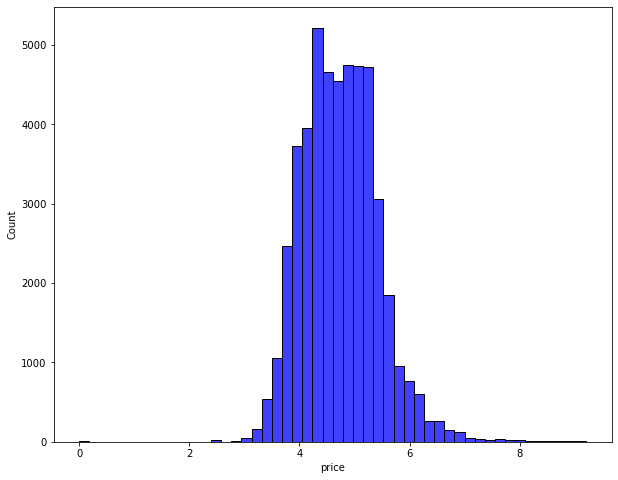

In [7]:
# If apply a log on the price, data looks more normal:

plt.figure(figsize = (10, 8))
sns.histplot(np.log1p(data.price), color = 'blue', bins = 50);

In [8]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
select = ['latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365' ]
data = data[select]
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


**Question 1:**
'reviews_per_month' is the only feature with missing values. It has 10,052 missing values.

In [10]:
data.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Question 2:**
The median (50% percentile) for variable 'minimum_nights' is 3. 

In [11]:
data.minimum_nights.median()

3.0

In [12]:
data.minimum_nights.describe()           # Another way to check median value

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

## Split the data

In [13]:
n = len(data)
n_train = int(len(data)*0.6)
n_val   = int(len(data)*0.2)
n_test  = int(len(data)*0.2)

print(n, n_train, n_val, n_test)

48895 29337 9779 9779


In [14]:
print(n, n_train + n_val + n_test)        # Check if number of obs in train, validation, and test set add to total number in original data

48895 48895


In [15]:
dt_train = data.iloc[:n_train]
dt_val   = data.iloc[n_train:n_train+n_val]
dt_test  = data.iloc[n_train+n_val:]

In [16]:
dt_train.head()       # Probably some order in latitude and longitude

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [17]:
idx = np.arange(n)

In [18]:
idx

array([    0,     1,     2, ..., 48892, 48893, 48894])

In [19]:
# Shuffle dataset using seed 42:

np.random.seed(42)
np.random.shuffle(idx)

In [20]:
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [21]:
# Split the data into training, validation, and test set using shuffled index:
dt_train = data.iloc[idx[:n_train]]
dt_val   = data.iloc[idx[n_train:n_train+n_val]]
dt_test  = data.iloc[idx[n_train+n_val:]]

In [22]:
dt_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [23]:
dt_train = dt_train.reset_index(drop = True)
dt_val   = dt_val.reset_index(drop = True)
dt_test  = dt_test.reset_index(drop = True)
print(len(dt_train), len(dt_val), len(dt_test))

29337 9779 9779


In [24]:
# Apply log transformation to the 'price' variable:
y_train = np.log1p(dt_train['price'].values)
y_val = np.log1p(dt_val['price'].values)
y_test = np.log1p(dt_test['price'].values)

In [25]:
y_train

array([4.49980967, 3.4339872 , 4.79579055, ..., 4.61512052, 4.2341065 ,
       3.8286414 ])

In [26]:
print(len(y_train), len(y_val), len(y_test))

29337 9779 9779


In [27]:
del dt_train['price']
del dt_val['price']
del dt_test['price']

In [28]:
dt_train.head()  # Confirm 'price' is removed from the data

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,NaN,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30


Notes: 
- Training, validation, and test data without filling NA are ready
- Target variables for training, validation, and test data are ready

**Question 3:** RMSEs are equal across 2 ways of filling missing values.



In [29]:
dt_train.isnull().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [30]:
dt_val.isnull().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2051
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [31]:
dt_test.isnull().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2003
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [32]:
data.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Filling missing data

Since the data is already splitted into 3 data sets, it would be more convenient to try filling 0s or mean in the 3 data sets rather than filling in the original data and split into 3 data sets again.

**Option 1**: fill missing values with 0

In [33]:
def prepare_X_0(df): 
    
    df = df.copy()                           
    df = df.fillna(0)                               # Filling missing data with 0s
    X = df.values                                   # Convert to numpy array for calculation
    
    return X

In [34]:
dt_train_f0 = prepare_X_0(dt_train)
dt_val_f0 = prepare_X_0(dt_val)

In [35]:
dt_train_f0

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [36]:
dt_train_f0.shape

(29337, 7)

Train a linear regression model: 

In [37]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) 
    
    XTX = X.T.dot(X) 
    XTX_inv = np.linalg.inv(XTX)  
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [38]:
w0_f0, w_f0 = train_linear_regression(dt_train_f0, y_train)
print(w0_f0, w_f0 )

-419.9126586345956 [ 1.30676225e+00 -5.02167855e+00 -5.59803110e-04 -4.07634896e-04
 -8.25470066e-03  1.33371320e-03  6.50203890e-04]


In [39]:
y_pred_f0 = w0_f0 + dt_train_f0.dot(w_f0)
y_pred_f0

array([4.7827747 , 4.45947457, 4.89702083, ..., 4.82048872, 4.86944872,
       4.6161256 ])

Use the validation data to evaluate the model:

In [40]:
y_pred_f0_val = w0_f0 + dt_val_f0.dot(w_f0)
y_pred_f0_val

array([4.57853272, 4.48375565, 4.73586367, ..., 4.77182321, 4.75592015,
       4.78192005])

In [41]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [42]:
score = round(rmse(y_val, y_pred_f0_val),2)
score

0.64

**Option 2**: fill missing values with mean

In [43]:
dt_train.reviews_per_month.describe()

count    23339.000000
mean         1.368549
std          1.653934
min          0.010000
25%          0.190000
50%          0.710000
75%          2.030000
max         27.950000
Name: reviews_per_month, dtype: float64

In [44]:
mean = dt_train.reviews_per_month.mean()
mean

1.3685492094777056

In [45]:
def prepare_X_mean(df): 
    
    df = df.copy()                           
    df = df.fillna(mean)                               # Filling missing data with 0s
    X = df.values                                   # Convert to numpy array for calculation
    
    return X

In [46]:
dt_train_fmean = prepare_X_mean(dt_train)
dt_val_fmean = prepare_X_mean(dt_val)

In [47]:
dt_train_fmean

array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [48]:
dt_train_fmean.shape

(29337, 7)

Train a linear regression model: 

In [49]:
w0_fmean, w_fmean = train_linear_regression(dt_train_fmean, y_train)
print(w0_fmean, w_fmean )

-423.5393081956561 [ 1.31148321e+00 -5.06799071e+00 -4.87741552e-04 -6.63849280e-04
  5.34563274e-03  1.32706019e-03  6.38794182e-04]


In [50]:
y_pred_fmean = w0_fmean + dt_train_fmean.dot(w_fmean)
y_pred_fmean

array([4.76589611, 4.45581848, 4.89107725, ..., 4.83526871, 4.87768975,
       4.60682893])

Use the validation data to evaluate the model:

In [51]:
y_pred_fmean_val = w0_fmean + dt_val_fmean.dot(w_fmean)
y_pred_fmean_val

array([4.56404917, 4.47586466, 4.72706726, ..., 4.76271671, 4.74761535,
       4.81081466])

In [52]:
score = round(rmse(y_val, y_pred_fmean_val),2)
score

0.64

RMSE is very similar across 2 options:
- Filling NA with 0s:    RMSE = 0.64
- Filling NA with means: RMSE = 0.64

**Question 4:** r = 0.0001 gives the best RMSE.

In [53]:
def train_linear_regression_reg(X, y, r = 0.001):                   # with Regularization
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) 
    
    XTX = X.T.dot(X) 
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)  
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [54]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 1, 10]:
    dt_train_f0 = prepare_X_0(dt_train)          
    w0, w = train_linear_regression_reg(dt_train_f0, y_train, r = r)

    dt_val_f0 = prepare_X_0(dt_val)
    y_pred = w0 + dt_val_f0.dot(w)
    score = rmse(y_val, y_pred) 
    
    print(r, '//', w0, '//', score)

0.0 // -419.9126586345956 // 0.6430337788649604
1e-05 // -419.41376378247526 // 0.6430371927861561
0.0001 // -414.9764926376158 // 0.6430723153643709
0.001 // -375.2736527536038 // 0.6437669735254034
0.01 // -191.78384053419805 // 0.6557528427434278
1 // -3.4992168360569007 // 0.6823116950157345
10 // -0.35127675889492427 // 0.6828430212099269


**Question 5:** The standard deviation of all the scores is 0.008. 

In [55]:
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
    # Split data:
    n_val = int(len(data) * 0.2)         
    n_test = int(len(data) * 0.2) 
    n_train = n - n_val - n_test
    
    idx = np.arange(len(data))
    
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    dt_train = data.iloc[idx[:n_train]]
    dt_val   = data.iloc[idx[n_train:n_train+n_val]]
    dt_test  = data.iloc[idx[n_train+n_val:]]
    
    dt_train = dt_train.reset_index(drop = True)
    dt_val   = dt_val.reset_index(drop = True)
    dt_test  = dt_test.reset_index(drop = True)
    
    y_train = np.log1p(dt_train['price'].values)
    y_val = np.log1p(dt_val['price'].values)
    y_test = np.log1p(dt_test['price'].values)
    
    del dt_train['price']
    del dt_val['price']
    del dt_test['price']
    
    # Prepare X matrix:
    dt_train = prepare_X_0(dt_train)
    dt_val = prepare_X_0(dt_val)
    
    # Train model:
    w0, w = train_linear_regression(dt_train, y_train)
    
    # Validation RSME
    y_pred = w0 + dt_val.dot(w)
    score = rmse(y_val, y_pred)
    
    # Print RMSEs across different seeds:
    print(seed, '//', w0, '//', score)
      

0 // -427.62844626626026 // 0.6549779961248554
1 // -414.70554910891804 // 0.646252368584408
2 // -423.25413365944144 // 0.6476558177376244
3 // -421.89331589352093 // 0.6375145070438145
4 // -422.0609909896382 // 0.6445809083258692
5 // -429.1787523173331 // 0.6305809996849464
6 // -427.4918955501337 // 0.6297851917458124
7 // -428.1884699033954 // 0.6506184267134927
8 // -427.69291185977454 // 0.6489780353719421
9 // -426.9826895634907 // 0.643756516820227


In [56]:
score = [0.6549779961248554, 0.646252368584408, 0.6476558177376244, 0.6375145070438145, 0.6445809083258692, 0.6305809996849464, 0.6297851917458124, 0.6506184267134927, 0.6489780353719421, 0.643756516820227]
std = np.std(score)
round(std, 3)

0.008

**Question 6:** the RMSE on the test dataset is 0.65.

In [57]:
n_val = int(len(data) * 0.2)         
n_test = int(len(data) * 0.2) 
n_train = n - n_val - n_test
    
idx = np.arange(len(data))
    
np.random.seed(9)
np.random.shuffle(idx)
    
dt_train = data.iloc[idx[:n_train]]
dt_val   = data.iloc[idx[n_train:n_train+n_val]]
dt_test  = data.iloc[idx[n_train+n_val:]]
    
dt_train = dt_train.reset_index(drop = True)
dt_val   = dt_val.reset_index(drop = True)
dt_test  = dt_test.reset_index(drop = True)
    
y_train = np.log1p(dt_train['price'].values)
y_val = np.log1p(dt_val['price'].values)
y_test = np.log1p(dt_test['price'].values)
    
del dt_train['price']
del dt_val['price']
del dt_test['price']

In [58]:
dt_full_train = pd.concat([dt_train, dt_val])

In [59]:
dt_full_train = dt_full_train.reset_index(drop=True)

In [60]:
dt_full_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.70423,-73.91595,1,3,0.13,1,0
1,40.77115,-73.92275,40,23,0.27,1,207
2,40.70401,-74.00932,29,0,NaN,96,1
3,40.74526,-73.97679,30,1,0.04,23,365
4,40.59349,-73.76377,1,1,0.16,1,90
...,...,...,...,...,...,...,...
39111,40.69440,-73.92420,3,26,2.43,1,3
39112,40.67133,-73.94526,2,8,0.40,1,0
39113,40.72982,-73.98593,2,2,0.11,1,0
39114,40.71969,-73.95620,1,1,0.02,1,0


In [61]:
dt_full_train = prepare_X_0(dt_full_train)

In [62]:
y_full_train = np.concatenate([y_train, y_val])

In [63]:
w0, w = train_linear_regression_reg(dt_full_train, y_full_train, r = 0.001)

In [64]:
dt_test = prepare_X_0(dt_test)

In [65]:
y_pred = w0 + dt_test.dot(w)
score = rmse(y_pred, y_test)
score

0.6452771348591311